# Deep Learning Hands-On Lab

This is the Deep Learning part of the hands-on. We will work with the fashion MIST.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The very first thing you do is to import your libraries that are required to build your machine learning pipeline. In the previous part you learned about libraries such as Pandas or Seaborn.

In this part we will use the Deep Learning framework Tensorflow. 

TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.It is used for both research and production at Google

TensorFlow was developed by the Google Brain team for internal Google use. It was released under the Apache License 2.0 on November 9, 2015.

Tensorflow can be used in Python, JavaScript, C++ and Java.

We will use tensorflow by using the keras framework which uses tensorflow as the backend. 

Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, Theano, or PlaidML.[1][2] Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. It was developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System),[3] and its primary author and maintainer is François Chollet, a Google engineer. Chollet also is the author of the XCeption deep neural network model[4].

In 2017, Google's TensorFlow team decided to support Keras in TensorFlow's core library.[5] Chollet explained that Keras was conceived to be an interface rather than a standalone machine learning framework. It offers a higher-level, more intuitive set of abstractions that make it easy to develop deep learning models regardless of the computational backend used.[6] Microsoft added a CNTK backend to Keras as well, available as of CNTK v2.0.[7][8]


## Import Libraries

In [1]:
import filecmp
import oci
from oci.object_storage.models import CreateBucketDetails
import os
import pandas as pd
import io
from PIL import Image
from io import StringIO
import cx_Oracle

In [2]:
%matplotlib inline
import numpy as np
np.random.seed(1)

import tensorflow as tf
# WARNING: In TensorFlow 2.0 doesn't exist 
#tf.random.set_random_seed(2)

from tensorflow import keras
from keras import preprocessing

import matplotlib.pyplot as plt

print("TensorFlow version: ", tf.__version__)
print("tensorflow.keras version: ", keras.__version__)
print("numpy version: ", np.__version__)

TensorFlow version:  1.14.0
tensorflow.keras version:  2.2.4-tf
numpy version:  1.16.4


Using TensorFlow backend.


# Object Storage

In [3]:
config = oci.config.from_file("/home/opc/.oci/config", "DEFAULT")
identity = oci.identity.IdentityClient(config)
user = identity.get_user(config["user"]).data
compartment_id = config["tenancy"]
object_storage = oci.object_storage.ObjectStorageClient(config)
namespace = object_storage.get_namespace().data
bucket_name = "machine_learning"
bucket = object_storage.get_bucket(namespace, bucket_name)

In [4]:
object_list = object_storage.list_objects(namespace, bucket_name)
for o in object_list.data.objects:
    print(o.name)

boston.csv
thshirt_1.jpg
trousers_1.jpg


In [5]:
object_name = "trousers_1.jpg"
#object_name = "newtest.txt"
#destination_dir = '/home/oracle/tmp'.format(object_name) 
get_obj = object_storage.get_object(namespace, bucket_name, object_name)
for chunktest in get_obj.data.raw.stream(1024 * 1024, decode_content=False):
    chunktest

In [6]:
imageStream = io.BytesIO(chunktest)
imageFile = Image.open(imageStream)
type(imageFile)
print(imageFile.size)

(202, 250)


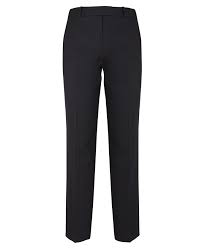

In [7]:
imageFile

# cx_Oracle

**TBD**

## Fashion MINST

Let's load the data. We can pull the data directly from the keras repository. 

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape
#Each Label is between 0-9
train_labels
test_images.shape

(10000, 28, 28)

In [10]:
train_images[0].shape

(28, 28)

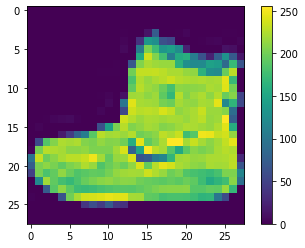

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.


In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

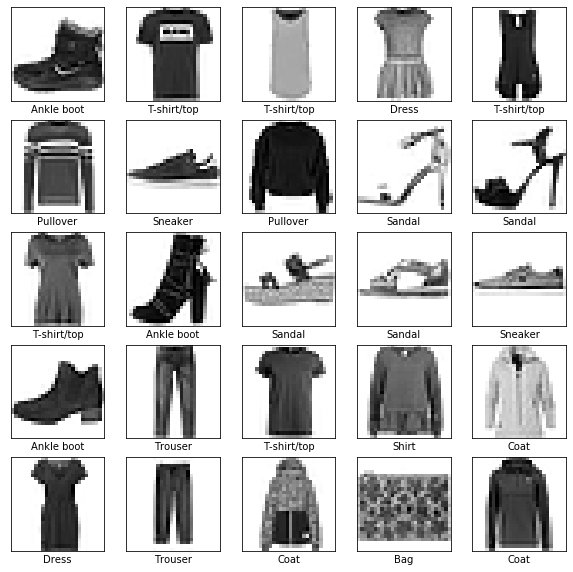

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Create Model

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4970 - acc: 0.8248
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3721 - acc: 0.8660
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3344 - acc: 0.8779
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3083 - acc: 0.8874
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2919 - acc: 0.8925
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2774 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2667 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2553 - acc: 0.9050
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2473 - acc: 0.9078
Epoch 10/10
60000/60000 [==============================] - 5s 80us/sample - loss: 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Test Model

In [78]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.3431 - acc: 0.8804
Test accuracy: 0.8804


In [79]:
predictions = model.predict(test_images)
predictions[0]

array([8.2986048e-07, 4.3227097e-08, 8.2970658e-08, 2.3514643e-07,
       3.3662086e-08, 1.1713797e-02, 1.1339409e-06, 5.0320357e-02,
       3.6678961e-07, 9.3796307e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])
#Model is most confident that it's an ankle boot. Let's see if it's correct

9

In [14]:
test_labels[0]

9

## Visualize Predictions

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

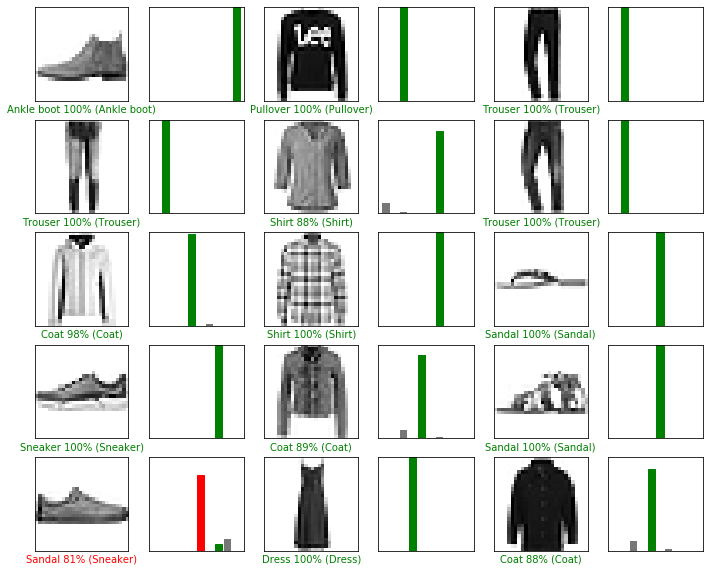

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## New Images

In [57]:
import cv2
imga = cv2.imread('img/coat02.jpg')
imgz = np.invert(imga)
imgb = cv2.resize(imgz, (28, 28))
imgc = cv2.cvtColor(imgb, cv2.COLOR_BGR2GRAY)
#imgc = imgb
imgd = imgc.reshape((-1,28, 28))
imgd = imgd / 255

In [61]:
testpredictions = model.predict(imgd)
np.argmax(testpredictions)

3

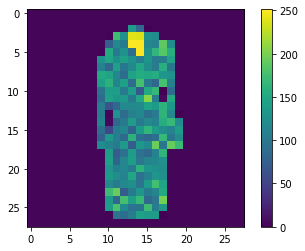

In [60]:
plt.figure()
plt.imshow(imgc)
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.


In [158]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']